Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com  
Port: 5432  
Database: training  
Username: dot_student  
Password: qgis  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [2]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')
cursor = conn.cursor()

In [ ]:
# This can also work
# df = pd.read_sql("select * from noise_311", conn)

In [3]:
statement = "SELECT unique_key, complaint_type, created_date, closed_date FROM noise_311"
cursor.execute(statement)
complaints = []
for row in cursor:
    complaints.append(row)


In [4]:
import pandas as pd
df = pd.DataFrame(complaints)
df.columns = ['unique_key', 'complaint', 'created_date', 'closed_date']
df_original = df.copy()

In [5]:
df.head()

,unique_key,complaint,created_date,closed_date
0,28792167,Noise - Street/Sidewalk,2014-08-31 23:59:00,2014-09-01 03:52:00
1,28789088,Noise - Vehicle,2014-08-31 23:56:00,2014-09-01 06:17:00
2,28791854,Noise - Commercial,2014-08-31 23:54:00,2014-09-01 01:29:00
3,28789936,Noise - Street/Sidewalk,2014-08-31 23:52:00,2014-09-01 02:53:00
4,28789931,Noise - Street/Sidewalk,2014-08-31 23:47:00,2014-09-01 01:06:00


In [6]:
df['time'] = df['closed_date']-df['created_date']
df.head(3)

,unique_key,complaint,created_date,closed_date,time
0,28792167,Noise - Street/Sidewalk,2014-08-31 23:59:00,2014-09-01 03:52:00,03:53:00
1,28789088,Noise - Vehicle,2014-08-31 23:56:00,2014-09-01 06:17:00,06:21:00
2,28791854,Noise - Commercial,2014-08-31 23:54:00,2014-09-01 01:29:00,01:35:00


In [7]:
df['time'].describe()

count                     37615
mean     0 days 07:44:22.532500
std      1 days 12:06:09.012799
min             0 days 00:01:00
25%             0 days 00:54:00
50%             0 days 02:02:00
75%             0 days 04:15:00
max            48 days 05:45:00
Name: time, dtype: object


### DOT Summary
| Summary        | DOT Values           | NOISE Values |
| ------------- |:-------------:|:-------------:|
|count|                       4547  |37615
|mean  |    8 days 16:15:03.514405  | 0 days 07:44:22.532500 |
|std |     15 days 10:48:08.619990  | 1 days 12:06:09.012799 |
|min |             0 days 00:00:01  | 0 days 00:01:00 |
|25%  |            0 days 12:41:58  | 0 days 00:54:00 |
|50% |             1 days 03:33:17  | 0 days 02:02:00 |
|75%  |     6 days 00:30:23.500000  | 0 days 04:15:00 |
|max |            89 days 18:54:00  |  48 days 05:45:00 |

In [9]:
df['time'].value_counts().sort_values(ascending=False)

0 days 00:21:00     222
0 days 00:10:00     221
0 days 00:36:00     212
0 days 00:33:00     211
0 days 00:31:00     210
0 days 00:27:00     209
0 days 00:25:00     207
0 days 00:28:00     206
0 days 00:23:00     204
0 days 00:26:00     202
0 days 00:32:00     201
0 days 00:30:00     200
0 days 00:38:00     199
0 days 00:44:00     199
0 days 00:42:00     196
0 days 00:17:00     196
0 days 00:48:00     195
0 days 00:34:00     195
0 days 00:49:00     195
0 days 00:41:00     193
0 days 00:22:00     192
0 days 00:11:00     190
0 days 00:40:00     190
0 days 00:24:00     189
0 days 00:20:00     188
0 days 00:14:00     188
0 days 00:53:00     188
0 days 00:39:00     187
0 days 00:37:00     186
0 days 00:50:00     185
                   ... 
1 days 23:59:00       1
1 days 18:09:00       1
3 days 14:14:00       1
2 days 05:15:00       1
1 days 04:27:00       1
2 days 10:00:00       1
3 days 15:18:00       1
0 days 13:55:00       1
1 days 10:54:00       1
0 days 17:36:00       1
3 days 18:50:00 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37615 entries, 0 to 37614
Data columns (total 5 columns):
unique_key      37615 non-null int64
complaint       37615 non-null object
created_date    37615 non-null datetime64[ns]
closed_date     37615 non-null datetime64[ns]
time            37615 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 1.4+ MB


In [12]:
df['time'].astype('timedelta64[h]')

0         3.0
1         6.0
2         1.0
3         3.0
4         1.0
5         3.0
6         1.0
7         4.0
8         4.0
9         3.0
10        4.0
11        2.0
12        3.0
13        5.0
14        3.0
15        1.0
16        3.0
17       13.0
18        1.0
19        2.0
20        5.0
21        0.0
22        0.0
23        2.0
24        5.0
25        0.0
26        2.0
27        2.0
28        2.0
29        5.0
         ... 
37585     3.0
37586     4.0
37587     1.0
37588     4.0
37589     0.0
37590     6.0
37591     1.0
37592     0.0
37593     4.0
37594     0.0
37595     0.0
37596     1.0
37597     1.0
37598     1.0
37599     2.0
37600     2.0
37601     3.0
37602     2.0
37603     0.0
37604     1.0
37605     1.0
37606    14.0
37607     3.0
37608     1.0
37609     1.0
37610    10.0
37611     2.0
37612     4.0
37613     2.0
37614     7.0
Name: time, dtype: float64

In [13]:
df['time']=(df['time'])/(pd.Timedelta(hours=1))
df['time'].head(10)

0    3.883333
1    6.350000
2    1.583333
3    3.016667
4    1.316667
5    3.100000
6    1.066667
7    4.300000
8    4.800000
9    3.416667
Name: time, dtype: float64

In [14]:
df['time'].describe()

count    37615.000000
mean         7.739592
std         36.102504
min          0.016667
25%          0.900000
50%          2.033333
75%          4.250000
max       1157.750000
Name: time, dtype: float64

DOT FILE
count    4547.000000
mean      208.250976
std       370.802394
min         0.000278
25%        12.699444
50%        27.554722
75%       144.506528
max      2154.900000
Name: time, dtype: float64

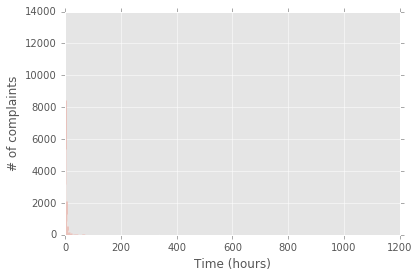

In [18]:
df['time'].hist(bins=100)
plt.xlabel('Time (hours)')
plt.ylabel('# of complaints')

#### Additional Analysis 

In [ ]:
# Frequency Table

graph01 = df['complaint'].value_counts().head(3).sort_values(ascending=True).plot(kind='barh')
print("Top 3 popular type of complaint\n")
print(df['complaint'].value_counts().head(3).sort_values(ascending=False))
graph01

In [ ]:
df.index = df['created_date']
df.head(2)

In [ ]:
df.groupby(df.index.hour).count().plot(y='unique_key',kind='bar')